In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.special
import glob
from matplotlib import colormaps
import matplotlib.colors as mcolors

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',100)

In [3]:
# get the colors and genus in descending order as previously defined in script: M2_DefineColors
goodColors = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_ColorsRGB.npy')
goodColorsHEX = np.load('//home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_ColorsHEX.npy')
genus_descending = np.load('/home/isabel/Documents/postDoc_Amsterdam/B_BioInfo/1_MyScripts/python/MetaGenomics/M2_colors_genusDescending.npy')

# set the paramter q
q = 2

In [4]:
# define functions:

def alphaDiv(p,q):
    # input
    ## -- p_i: the abundancy of the genus/species as an np.array
    ## -- q: the paramter for the generalized mean
    div = np.sum(p**q)**(1/(1-q))
    return div

def Shannon(p):
    # input
    ## -- p_i: the abundancy of the genus/species as an np.array
    ## -- q: the paramter for the generalized mean
    p_woZero = p[p!=0]
    div = -np.sum(p_woZero*np.log(p_woZero))
    return div

In [5]:
# read in data to panda

InPath="/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/"
file_motu="motus_Merge_genus_032024_0minFrac_FromPY"
file_kra="KraBracken_DBplusPf_042024_0minFrac_genus_FromPY"

df_motu=pd.read_csv(InPath+file_motu+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])
df_kra=pd.read_csv(InPath+file_kra+".csv",delimiter=",",index_col=['institution','treatment','week','replicate'])

threshold = 0.01
print(df_kra.shape)
len(np.array(df_kra.iloc[0,1:]))

(93, 1294)


1293

# Idea:
- make scatter plots of alpha values between motu and kraken
- make scatter plots of different alpha values for e.g. only kraken

In [6]:
# get an array with alpha values for the samples 
### for MOTU!!!

df_kra_namesShort = np.array(df_kra.iloc[:,0])  # get the names
df_kra_alpha = np.zeros(df_kra.shape[0])
df_kra_shannon = np.zeros(df_kra.shape[0])

for i in range(df_kra.shape[0]):
    df_kra_alpha[i] = alphaDiv(np.array(df_kra.iloc[i,1:]),3)
    df_kra_shannon[i] = Shannon(np.array(df_kra.iloc[i,1:]))

# add it to the df
df_kra['alpha'] = df_kra_alpha
df_kra['shannon'] = df_kra_shannon

In [7]:
# get an array with alpha values for the samples 
### for kraken!!!

df_motu_namesShort = np.array(df_motu.iloc[:,0])  # get the names
df_motu_alpha = np.zeros(df_motu.shape[0])
df_motu_shannon = np.zeros(df_motu.shape[0])

for i in range(df_motu.shape[0]):
    df_motu_alpha[i] = alphaDiv(np.array(df_motu.iloc[i,1:]),q)
    df_motu_shannon[i] = Shannon(np.array(df_motu.iloc[i,1:]))

# add it to the df
df_motu['alpha'] = df_motu_alpha
df_motu['shannon'] = df_motu_shannon
df_motu

df_kra.loc['Gent'].alpha

treatment  week  replicate
bb         1     1            1.534816
                 2            1.194103
                 3            1.170890
                 4            1.197990
           15    1            1.424866
                 2            3.166309
                 3            1.935962
                 4            1.906822
                 5            1.819037
iso        15    1            1.245404
                 2            1.433327
                 3            1.119979
                 4            1.159478
Name: alpha, dtype: float64

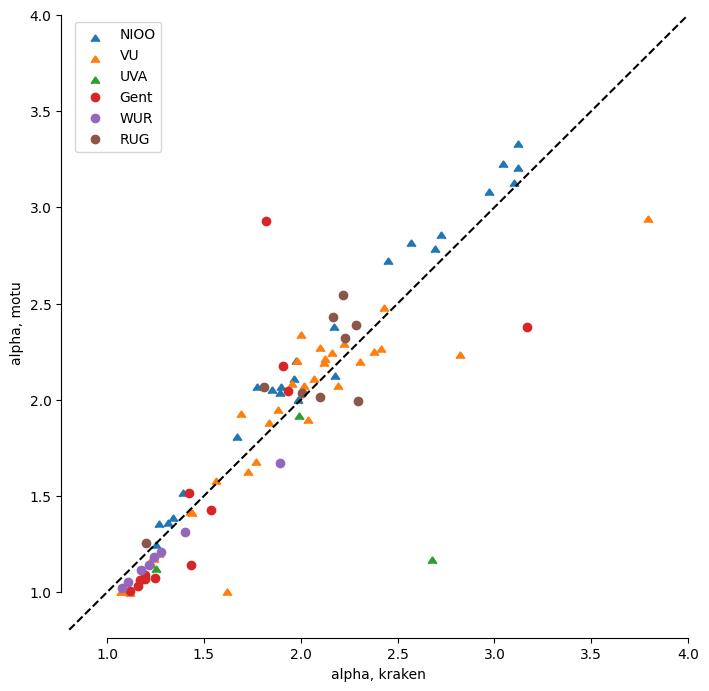

In [8]:
## plot!! alpha

#### scatter motu versus kraken

fig1, ax1 = plt.subplots(figsize=(8, 8))

plt.scatter(df_kra.loc['NIOO'].alpha,
            df_motu.loc['NIOO'].alpha,marker=6,label="NIOO")

plt.scatter(df_kra.loc['VU'].alpha,
            df_motu.loc['VU'].alpha,marker=6,label="VU")

plt.scatter(df_kra.loc['UVA'].alpha,
            df_motu.loc['UVA'].alpha,marker=6,label="UVA")

plt.scatter(df_kra.loc['Gent'].alpha,
            df_motu.loc['Gent'].alpha,marker='o',label="Gent")

plt.scatter(df_kra.loc['WUR'].alpha,
            df_motu.loc['WUR'].alpha,marker='o',label="WUR")

plt.scatter(df_kra.loc['RUG'].alpha,
            df_motu.loc['RUG'].alpha,marker='o',label="RUG")


ax1.plot([0,5],[0,5], '--k')
ax1.set_xlim([0.8,4])
ax1.set_ylim([0.8,4])
ax1.set_xlabel('alpha, kraken')
ax1.set_ylabel('alpha, motu')
#ax3.set_xlabel('all reads', fontsize=14)
#ax3.set_ylabel('unclassified reads', fontsize=14)
#df.loc[df['institution'].isin(['NIOO'])].allReads
plt.legend()
sns.despine(offset=5, trim=True)
#fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/plots/Motu_vs_Kraken.png", 
#             dpi=300, bbox_inches='tight')

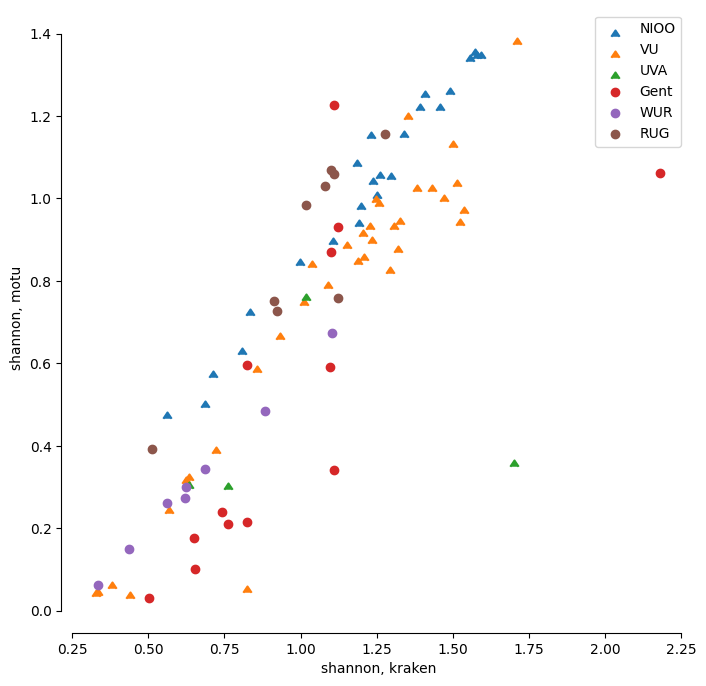

In [11]:
## plot!! alpha

#### scatter motu versus kraken

fig1, ax1 = plt.subplots(figsize=(8, 8))

plt.scatter(df_kra.loc['NIOO'].shannon,
            df_motu.loc['NIOO'].shannon,marker=6,label="NIOO")

plt.scatter(df_kra.loc['VU'].shannon,
            df_motu.loc['VU'].shannon,marker=6,label="VU")

plt.scatter(df_kra.loc['UVA'].shannon,
            df_motu.loc['UVA'].shannon,marker=6,label="UVA")

plt.scatter(df_kra.loc['Gent'].shannon,
            df_motu.loc['Gent'].shannon,marker='o',label="Gent")

plt.scatter(df_kra.loc['WUR'].shannon,
            df_motu.loc['WUR'].shannon,marker='o',label="WUR")

plt.scatter(df_kra.loc['RUG'].shannon,
            df_motu.loc['RUG'].shannon,marker='o',label="RUG")


#ax1.plot([0,5],[0,5], '--k')
#ax1.set_xlim([0.8,2.5])
#ax1.set_ylim([0.8,3])
ax1.set_xlabel('shannon, kraken')
ax1.set_ylabel('shannon, motu')
#ax3.set_xlabel('all reads', fontsize=14)
#ax3.set_ylabel('unclassified reads', fontsize=14)
#df.loc[df['institution'].isin(['NIOO'])].allReads
plt.legend()
sns.despine(offset=5, trim=True)
#fig1.savefig("/home/isabel/Documents/postDoc_Amsterdam/1_EvolWormJourney/1_Genomics/2_EvolGenomics/2_Metagenomics/1_taxonomy/plots/Motu_vs_Kraken_shannon.png", 
#             dpi=300, bbox_inches='tight')

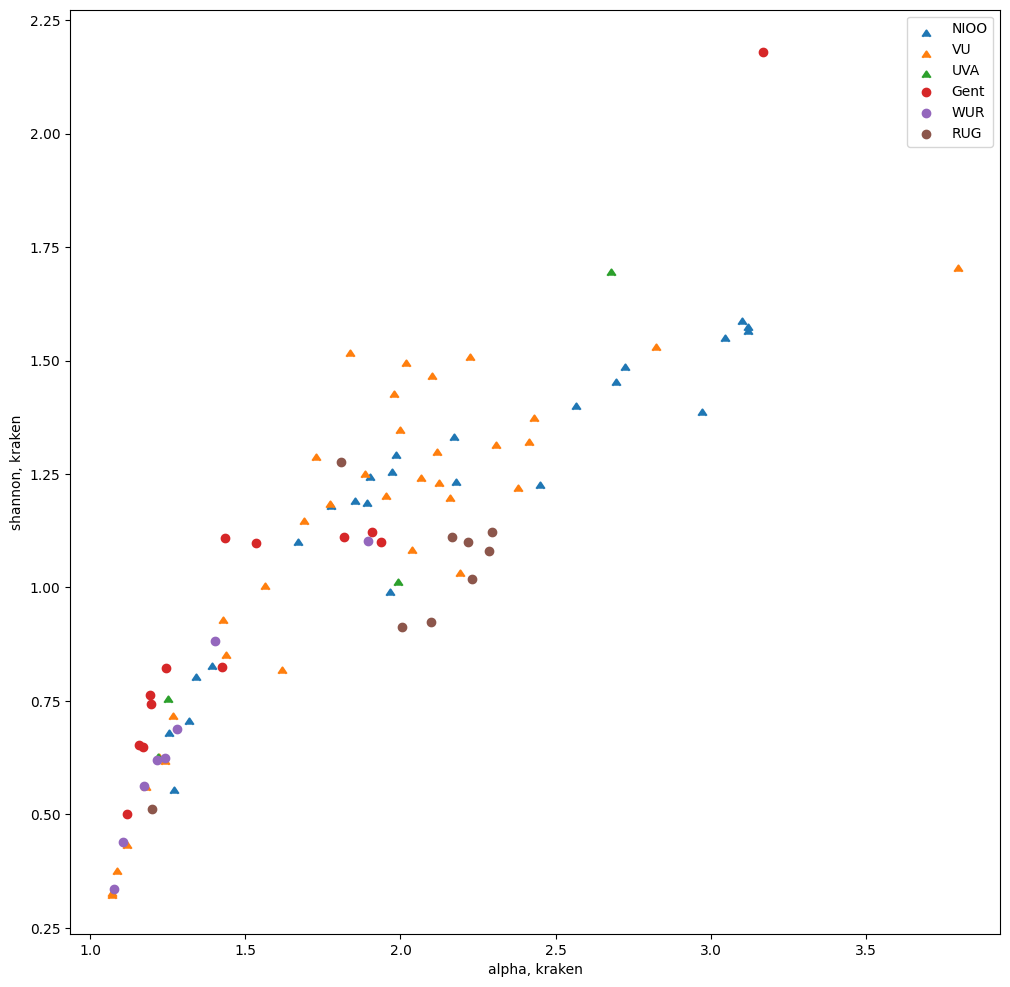

In [14]:
## plot!!

#### scatter motu versus kraken

fig2, ax2 = plt.subplots(figsize=(12, 12))

plt.scatter(df_kra.loc['NIOO'].alpha,
            df_kra.loc['NIOO'].shannon,marker=6,label="NIOO")

plt.scatter(df_kra.loc['VU'].alpha,
            df_kra.loc['VU'].shannon,marker=6,label="VU")

plt.scatter(df_kra.loc['UVA'].alpha,
            df_kra.loc['UVA'].shannon,marker=6,label="UVA")

plt.scatter(df_kra.loc['Gent'].alpha,
            df_kra.loc['Gent'].shannon,marker='o',label="Gent")

plt.scatter(df_kra.loc['WUR'].alpha,
            df_kra.loc['WUR'].shannon,marker='o',label="WUR")

plt.scatter(df_kra.loc['RUG'].alpha,
            df_kra.loc['RUG'].shannon,marker='o',label="RUG")


#ax2.plot([0,5],[0,5], '--k')
#ax2.set_xlim([0.8,4])
#ax2.set_ylim([0.8,4])
ax2.set_xlabel('alpha, kraken')
ax2.set_ylabel('shannon, kraken')
#ax3.set_xlabel('all reads', fontsize=14)
#ax3.set_ylabel('unclassified reads', fontsize=14)
#df.loc[df['institution'].isin(['NIOO'])].allReads
plt.legend()

In [9]:
## which sample has a big difference in the alpha values?

diff_methods = np.array(df_kra['alpha'])-np.array(df_motu['alpha'])
a = np.argmax(diff_methods)
a

49

In [10]:
df_kra_namesShort[a]

'UVA_bb_0_1'